In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [2]:
df=pd.read_csv("segmentation data.csv",index_col='ID')

In [50]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size', 'Segment'],
      dtype='object')

In [3]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


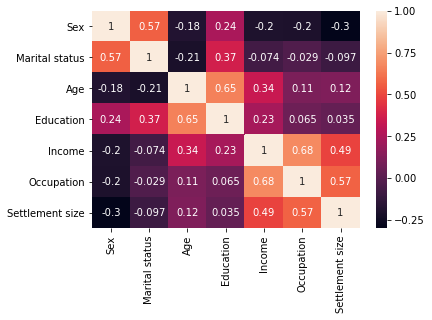

In [5]:
sns.heatmap(df.corr(),annot=True)

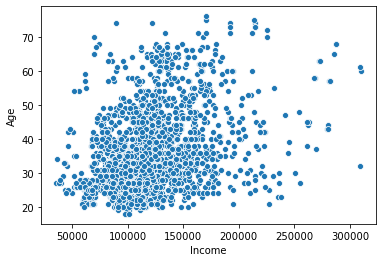

In [6]:
sns.scatterplot(x='Income',y='Age',data=df)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
std=scaler.fit_transform(df)

In [9]:
std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [10]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [11]:
cluster = linkage(std,method='ward')

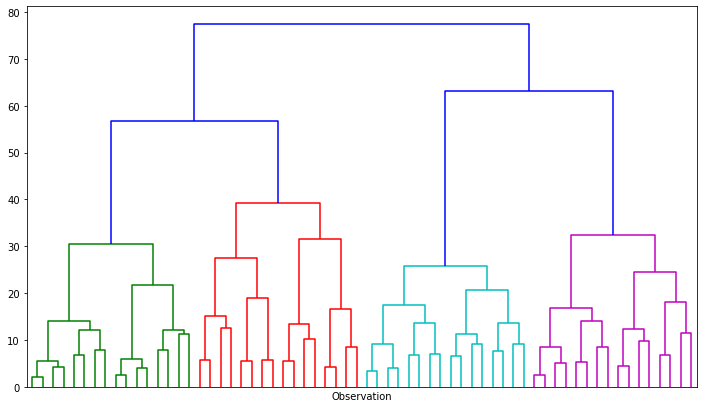

In [12]:
plt.figure(figsize=(12,7))
plt.xlabel("Observation")
dendrogram(cluster,show_leaf_counts=False,no_labels=True,truncate_mode='level',p=5);
plt.show()

# K-Means

In [13]:
from sklearn.cluster import KMeans

In [14]:
elbow = []
for i in range (1,11):
    Kmeans=KMeans(n_clusters=i,random_state=101)
    Kmeans.fit(std)
    elbow.append(Kmeans.inertia_)

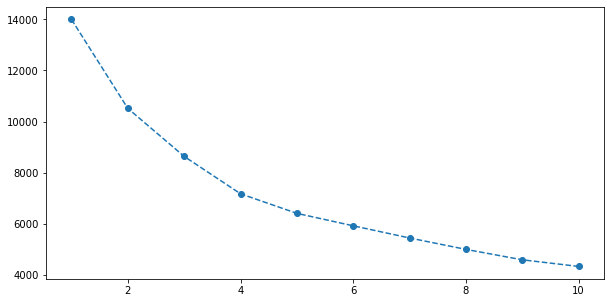

In [15]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),elbow,marker='o',ls='--')

In [16]:
Kmeans=KMeans(n_clusters=4,random_state=101)

In [17]:
Kmeans.fit(std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [18]:
results=df.copy()
results['Clusters']=Kmeans.labels_

In [19]:
results

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,3
100000002,1,1,22,1,150773,1,2,1
100000003,0,0,49,1,89210,0,0,0
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,0
100001997,1,1,27,1,117744,1,0,1
100001998,0,0,31,0,86400,0,0,0


In [20]:
analysis=results.groupby(['Clusters']).mean()
analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Clusters,,,,,,,
0,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061


In [21]:
analysis['# Count']=results[['Clusters','Sex']].groupby(['Clusters']).count()
analysis[" Prob size"]=analysis['# Count']/len(df)

In [22]:
analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,# Count,Prob size
Clusters,,,,,,,,,
0,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384,461,0.2305
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,264,0.1320


In [23]:
analysis.rename({0:'Fewer Opportunity',3:"Well off",2:"Career focused",1:"Standard"})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,# Count,Prob size
Clusters,,,,,,,,,
Fewer Opportunity,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384,461,0.2305
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Well off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,264,0.1320


In [24]:
df['Segment']=results['Clusters'].map({0:'Fewer Opportunity',3:"Well off",2:"Career focused",1:"Standard"})

In [25]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,Well off
100000002,1,1,22,1,150773,1,2,Standard
100000003,0,0,49,1,89210,0,0,Fewer Opportunity
100000004,0,0,45,1,171565,1,1,Career focused
100000005,0,0,53,1,149031,1,1,Career focused
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,Fewer Opportunity
100001997,1,1,27,1,117744,1,0,Standard
100001998,0,0,31,0,86400,0,0,Fewer Opportunity


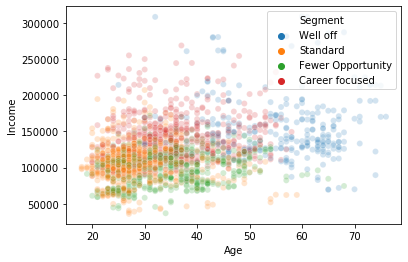

In [26]:
sns.scatterplot(x='Age',y='Income',data=df,hue='Segment',alpha=0.2)

# Dimension reduction

In [27]:
from sklearn.decomposition import PCA
pca=PCA()

In [28]:
pca.fit(std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

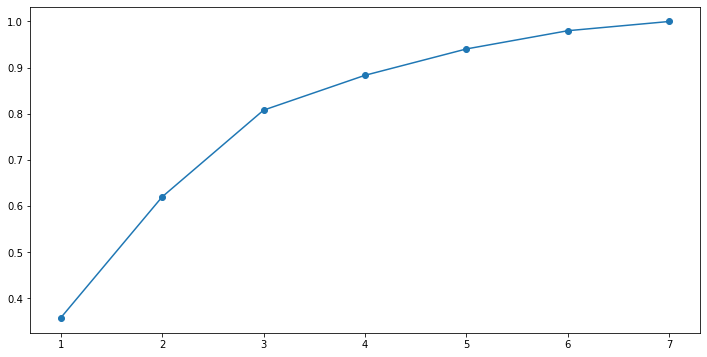

In [30]:
# Keeping 80% of the component
plt.figure(figsize=(12,6))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker="o")

In [31]:
pca=PCA(n_components=3)

In [32]:
pca.fit(std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
#Results

pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [34]:
pca_comp=pd.DataFrame(pca.components_,columns=df.drop(['Segment'],axis=1).columns)

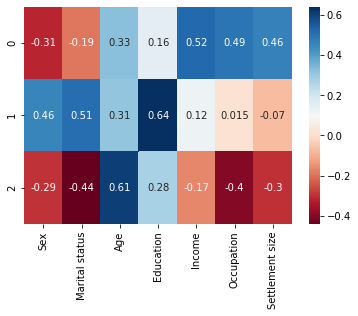

In [35]:
sns.heatmap(pca_comp,annot=True,cmap="RdBu")

In [36]:
score_pca=pca.transform(std)

In [37]:
#Kmeans using PCA
elbow = []
for i in range (1,11):
    Kmeans_pca=KMeans(n_clusters=i,random_state=101)
    Kmeans_pca.fit(score_pca)
    elbow.append(Kmeans_pca.inertia_)

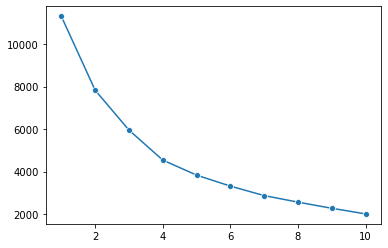

In [38]:
sns.lineplot(x=range(1,11),y=elbow,marker='o',ls='--')

In [39]:
kmeans_pca=KMeans(n_clusters=4,random_state=101)

In [40]:
kmeans_pca.fit(score_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [41]:
pca_df=pd.concat([df.drop('Segment',axis=1).reset_index(drop=True),pd.DataFrame(score_pca)],axis=1)
pca_df.columns.values[-3:]=['Comp1','Comp2','Comp3']
pca_df['pca segment']=kmeans_pca.labels_
pca_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Comp1,Comp2,Comp3,pca segment
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,1
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,2
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,2
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,1
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,1


In [42]:
pca_df.groupby('pca segment').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Comp1,Comp2,Comp3
pca segment,,,,,,,,,,
0,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
1,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
2,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


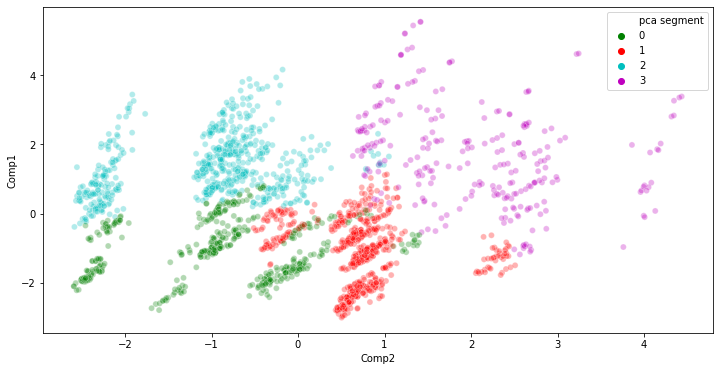

In [45]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Comp2',y='Comp1',data=pca_df,hue='pca segment',palette=['g','r','c','m'],alpha=0.3)

## Export Scaler

In [49]:
pickle.dump(scaler,open("scaler.pickle",'wb'))
pickle.dump(pca,open("pca.pickle",'wb'))
pickle.dump(kmeans_pca,open("kmeans_pca.pickle",'wb'))